In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
df= pd.read_csv('../Ficheros/attack_limpieza2.csv', index_col = 0)

Por lo tanto, en este ejercicio tendremos que limpiar los outliers. 
1- ¿Sobre qué columnas podremos eliminar o reemplazar los outliers?

In [2]:
df.drop(["Unnamed: 0.1"], axis = 1, inplace=True)

In [3]:
df.sample(10)

,case_number,year,country,activity,age,species_,date,mes,fatal_,sex2,nuevas_edades
4905,1941.02.13.,1941,australia,Fishing,34,NAN,13-Feb-1941,Feb,n,M,34.0
3323,1976.11.25,1976,usa,Surfing,19,Lemon,25-Nov-1976,Nov,n,M,19.0
6077,1868.01.04.R,1868,australia,Fishing,NAN,NAN,Reported 04-Jan-1868,Jan,n,NAN,NaN
4691,1948.12.10,1948,australia,Fishing,NAN,NAN,10-Dec-1948,Dec,n,M,NaN
2088,2001.08.12,2001,thailand,Fell off banana boat,21 & ?,Unspecified,12-Aug-2001,Aug,n,M,21.0
3117,1983.00.00.d,1983,NAN,Swimming,NAN,NAN,Ca. 1983,NAN,n,M,NaN
4252,1959.05.16,1959,usa,NAN,37,Unspecified,16-May-1959,May,n,F,37.0
1531,2007.07.00,2007,senegal,Murder,NAN,Unspecified,Jul-2007,Jul,NAN,NAN,NaN
4620,1950.10.04,1950,australia,Fishing,25,Unspecified,04-Oct-1950,Oct,n,M,25.0
2618,1994.01.30,1994,south africa,Windsurfing,44,NAN,30-Jan-1994,Jan,n,M,44.0


In [4]:
df["year"].unique()

array([1800, 1797, 1792, 1791, 1788, 1787, 1786, 1785, 1784, 1783, 1780,
       1779, 1776, 1771, 1767, 1764, 1758, 1753, 1751, 1749, 1755, 1748,
       1742, 1738, 1733, 1723, 1721, 1703, 1700, 1642, 1638, 1637, 1617,
       1595, 1580, 1555, 1554, 1543,  500,   77,    5,    0, 2018, 2017,
       2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006,
       2005, 2004, 2003, 2002, 2001, 2000, 1999, 1998, 1997, 1996, 1995,
       1984, 1994, 1993, 1992, 1991, 1990, 1989, 1969, 1988, 1987, 1986,
       1985, 1983, 1982, 1981, 1980, 1979, 1978, 1977, 1976, 1975, 1974,
       1973, 1972, 1971, 1970, 1968, 1967, 1966, 1965, 1964, 1963, 1962,
       1961, 1960, 1959, 1958, 1957, 1956, 1955, 1954, 1953, 1952, 1951,
       1950, 1949, 1948, 1848, 1947, 1946, 1945, 1944, 1943, 1942, 1941,
       1940, 1939, 1938, 1937, 1936, 1935, 1934, 1933, 1932, 1931, 1930,
       1929, 1928, 1927, 1926, 1925, 1924, 1923, 1922, 1921, 1920, 1919,
       1918, 1917, 1916, 1915, 1914, 1913, 1912, 19

In [5]:
# En la columna años es necesario trabajar los outliers porque todo lo que esté por debajo de 1700 son datos extraños, año 0, año 5... no podía haber registros
# En la columna nuevas_edades también vamos a estudiarlo porque no sabemos si bebés o tercera edad pueden tener sentido

2- Identifica visualmente los outliers


In [6]:
df_numericas = df.select_dtypes(include=np.number)

In [7]:
df_numericas

,year,nuevas_edades
0,1800,NaN
1,1797,NaN
2,1792,NaN
3,1791,NaN
4,1788,NaN
...,...,...
6279,1804,NaN
6280,1803,NaN
6281,1803,NaN
6282,1802,NaN


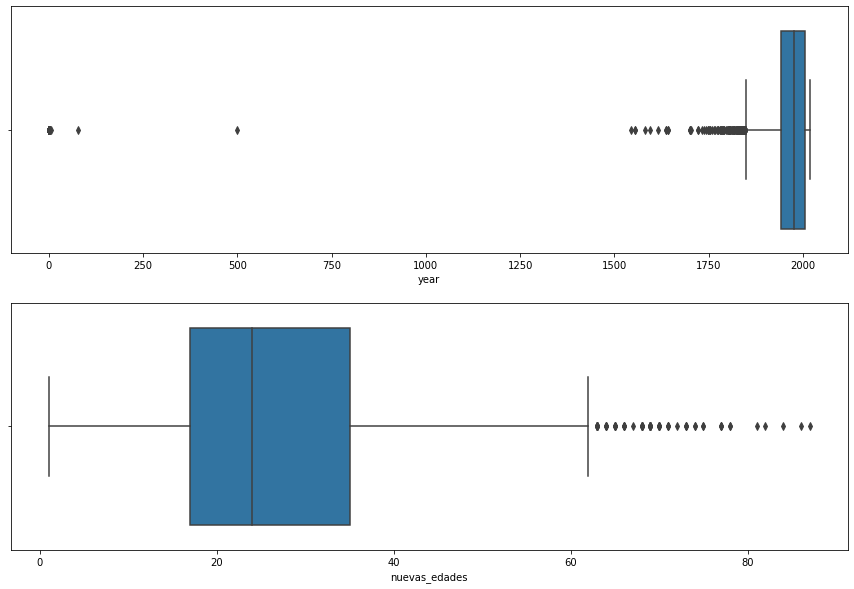

In [8]:
fig, ax = plt.subplots(2, 1, figsize=(15,10))

for i in range(len(df_numericas.columns)):
    sns.boxplot(x=df_numericas.columns[i], data=df_numericas, ax=ax[i])
plt.show()

3- Identifica sobre el dataframe las filas que son outliers

In [9]:
# cálculo del Q1 para columna year
Q1y = np.percentile(df['year'], 25)
Q1y

1942.0

In [10]:
# cálculo del Q3 para columna year
Q3y = np.percentile(df['year'], 75)
Q3y

2005.0

In [11]:
#calculemos el IQR 

IQRy = Q3y - Q1y
IQRy

63.0

In [12]:
# multiplicamos el IQR por 1.5

outlier_step_y= 1.5 * IQRy
outlier_step_y

94.5

In [13]:
outliers_data = df[(df['year'] < Q1y - outlier_step_y) | (df["year"] > Q3y + outlier_step_y)]
outliers_data.sample(20)

,case_number,year,country,activity,age,species_,date,mes,fatal_,sex2,nuevas_edades
162,ND.0008,0,australia,Fishing,NAN,Unspecified,Before 1906,NAN,y,M,NaN
6231,1837.00.00.a,1837,usa,NAN,NAN,Unspecified,Ca. 1837,NAN,NAN,M,NaN
6,1786.08.10.R,1786,barbados,Washing himself,NAN,NAN,Reported 10-Aug-1786,Aug,y,M,NaN
2,1792.09.12,1792,england,Fishing,NAN,NAN,12-Sep-1792,Sep,y,M,NaN
49,ND-0154,0,canada,Fishing,NAN,NAN,Before 1939,NAN,n,M,NaN
151,ND.0019,0,usa,Fishing,NAN,NAN,Before 1921,NAN,n,M,NaN
6281,1803.03.00,1803,australia,NAN,NAN,NAN,Mar-1803,Mar,n,M,NaN
78,ND-0109,0,usa,Wade-fishing,NAN,NAN,Before 2006,NAN,n,M,NaN
30,1700.00.00.b,1700,france,Bathing,NAN,White,1700s,NAN,n,M,NaN
169,ND.0001,0,ceylon (sri lanka),Swimming,15,NAN,1845-1853,NAN,y,M,15.0


In [14]:
# cálculo del Q1 para columna nuevas edades

Q1e = np.nanpercentile(df['nuevas_edades'], 25)
Q1e

17.0

In [15]:
# cálculo del Q3 para columna nuevas edades
Q3e = np.nanpercentile(df['nuevas_edades'], 75)
Q3e

35.0

In [16]:
#calculemos el IQR 

IQRe = Q3e - Q1e
IQRe

18.0

In [17]:
# multiplicamos el IQR por 1.5

outlier_step_e= 1.5 * IQRe
outlier_step_e

27.0

In [18]:
outliers_data_e = df[(df['nuevas_edades'] < Q1e - outlier_step_e) | (df["nuevas_edades"] > Q3e + outlier_step_e)]
outliers_data_e.head()

,case_number,year,country,activity,age,species_,date,mes,fatal_,sex2,nuevas_edades
207,2018.03.09.b,2018,australia,Swimming,69,Unspecified,9-Mar-2018,Mar,n,M,69.0
270,2017.08.23,2017,usa,SUP,69,White,23-Aug-2017,Aug,n,M,69.0
300,2017.06.17,2017,spain,Swimming,82,NAN,17-Jun-2017,Jun,n,M,82.0
311,2017.05.27,2017,australia,Fishing,73,NAN,27-May-2017,May,n,M,73.0
329,2017.04.12.a,2017,south africa,Scuba Diving,68,Unspecified,12-Apr-2017,Apr,NAN,M,68.0


4- Reemplaza los outliers por el estadístico más correcto.

In [19]:
# en la columna year vamos a reemplazar los outliers por la mediana

In [20]:
# En el paso anterior, probamos a hacer el código fuera de la función, paso a paso y ahora cogimos la función de los apuntes

In [21]:
def detectar_outliers(lista_columnas, dataframe): 
    
    dicc_indices = {} # creamos un diccionario donde almacenaremos índices de los outliers
    
    # iteramos por la lista de las columnas numéricas de nuestro dataframe
    for col in lista_columnas:
        
        #calculamos los cuartiles Q1 y Q3
        Q1 = np.nanpercentile(df[col], 25)
        Q3 = np.nanpercentile(df[col], 75)
        
        # calculamos el rango intercuartil
        IQR = Q3 - Q1
        
        # calculamos los límites
        outlier_step = 1.5 * IQR
        
        # filtramos nuestro dataframe para indentificar los outliers
        outliers_data = dataframe[(dataframe[col] < Q1 - outlier_step) | (dataframe[col] > Q3 + outlier_step)]
        
        
        if outliers_data.shape[0] > 0: # chequeamos si nuestro dataframe tiene alguna fila. 
        
            dicc_indices[col] = (list(outliers_data.index)) # si tiene fila es que hay outliers y por lo tanto lo añadimos a nuestro diccionario
        
    
    return dicc_indices

In [34]:
ind = detectar_outliers(df_numericas, df)
ind

{'year': [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  1

In [48]:
for v in ind["year"]:
   mediana = df["year"].median()
   df.replace(df.loc[v]["year"],mediana, inplace=True)


In [49]:
df.sample(30)

,case_number,year,country,activity,age,species_,date,mes,fatal_,sex2,nuevas_edades
244,2017.10.09,2017,usa,Surfing,54,Tiger,09-Oct-2017,Oct,n,M,54.0
20,1749.00.00,1977,cuba,Swimming,14,NAN,1749,NAN,n,M,14.0
4300,1958.09.01,1958,usa,Spearfishing,20,NAN,01-Sep-1958,Sep,n,M,20.0
2477,1996.02.19.R,1996,usa,Swimming in fish tank,32,Unspecified,Reported 19-Feb-1996,Feb,n,F,32.0
2999,1985.10.24,1985,south africa,Body boarding,22,White,24-Oct-1985,Oct,n,M,22.0
5557,1910.03.31,1910,panama,Fell overboard from USS cruiser Tacoma,NAN,NAN,31-Mar-1910,Mar,y,M,NaN
964,2012.04.19.b,2012,usa,Surfing,28,Unspecified,19-Apr-2012,Apr,n,M,28.0
3071,1983.12.30,1983,greece,Spearfishing,36,Unspecified,30-Dec-1983,Dec,NAN,M,36.0
917,2012.08.26,2012,brazil,Swimming,18,NAN,26-Aug-2012,Aug,y,M,18.0
1785,2004.11.26,2004,south africa,Playing,16,Unspecified,26-Nov-2004,Nov,n,M,16.0


5- Guarda el csv con las columnas limpias para seguir trabajando con este dataframe limpio en el siguiente pair programming de limpieza.

In [50]:
df.to_csv("../Ficheros/attack_limpieza3.csv")